# Download	the	dataset	of	handwritten	digits	collected	by	USPS
• Dataset	is	attached	“usps_all.mat” file
  We import the required libraries

In [ ]:
cd drive/My\ Drive/2021/hand\ written\ digits/

/content/drive/My Drive/2021/hand written digits


In [ ]:
ls

'Untitled document.gdoc'   usps_all.mat


In [ ]:
import time
import scipy.io
import numpy as np
import pandas as po
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
mat = scipy.io.loadmat('usps_all.mat')

In [ ]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [ ]:
mat['data'].shape

(256, 1100, 10)

In [ ]:
mat['data'][:, :, 0].shape

(256, 1100)

In [ ]:
mat['data'].shape

(256, 1100, 10)

In [ ]:
mat['data'].transpose(2, 1, 0).shape

(10, 1100, 256)

In [ ]:
vis = np.vstack([mat['data'].transpose(2, 1, 0)[i, :, :] for i in range(10)])

In [ ]:
vis.shape

(11000, 256)

In [ ]:
# visualize the dataset given

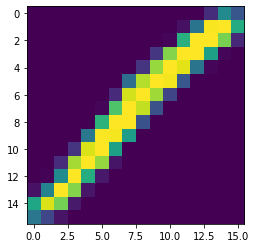

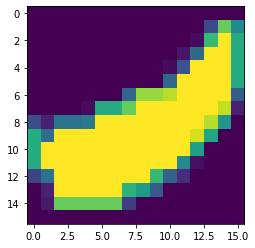

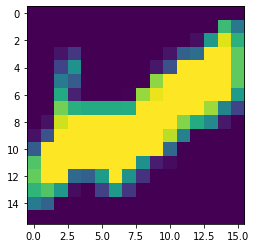

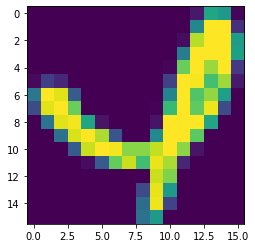

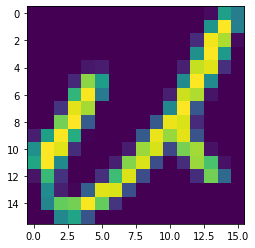

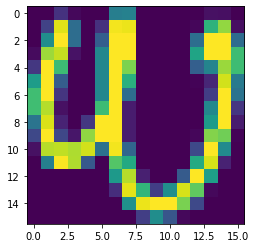

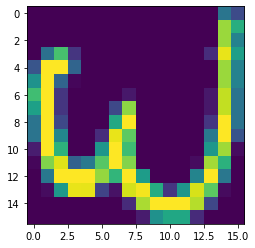

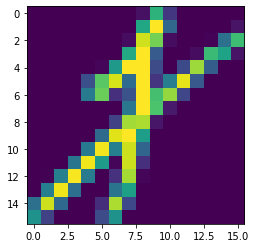

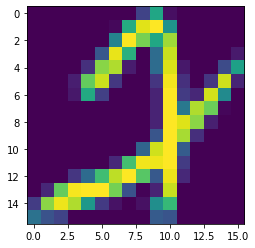

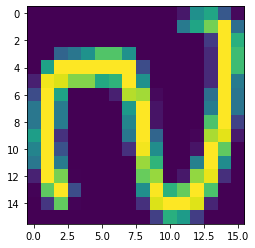

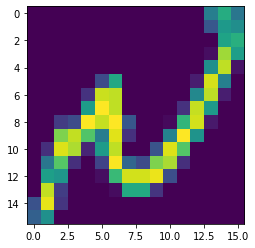

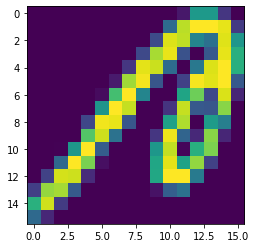

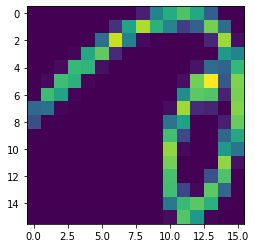

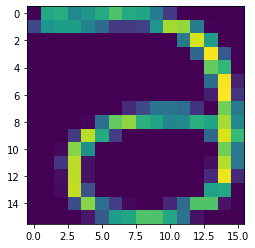

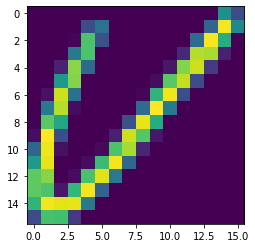

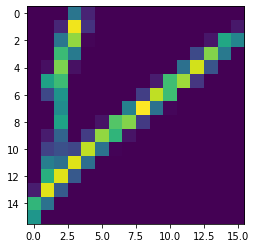

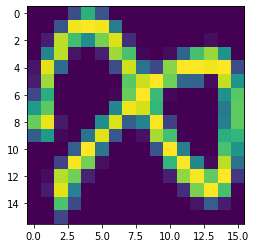

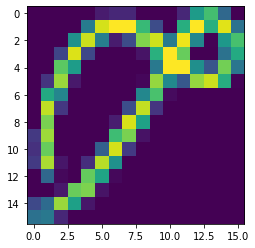

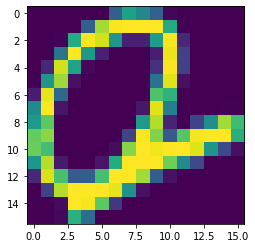

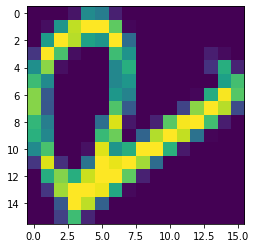

In [ ]:
for i in range(20):
  plt.imshow(vis[i*500].reshape(16,16))
  plt.show()

In [ ]:
np.array([[i]*1100 for i in range(10)]).reshape(-1).shape

(11000,)

In [ ]:
np.vstack([mat['data'].transpose(2, 1, 0)[i, :600, :] for i in range(10)]).shape

(6000, 256)

In [ ]:
# Algorithm to choose optimal N - choose the value of N which gives best test performance

Study	the	role	of	the	split	of	the	training	vs	testing	data	for	classification.	Specifically:	
• Divide	each	class	into	two	sets:	the	training	set	consisting	of	N	examples	for	each	of	the	digits	0	
through	9,	and	the	testing	set	consisting	of	1100	−	N	examples	of	each	of	the	digits	0	through	
9,	where	N	ranges	from	100	to	1000.	Propose	and	describe	a	selection	algorithm	for	choosing	
N	out	of	1100	images	for	any	integer	value	of	N.		
• Design	and	implement	a	method	to	test	and	estimate	your	computer’s	capa- bility	to	perform	
numerical	computations.	Estimate	the	computational	cost	of	this	Project	and	use	it	to	decide	
on	a	reasonable	number	of	experiments	you	can	perform.	Quantify	this	information	and	use	it	
to	guide	your	personal	numerical	goals,	such	as	the	number	of	different	values	of	N	that	you	
will	test.		
• Use	the	k	nearest	neighbors	classification	scheme	in	the	standard	Euclidean	metric	with	fixed	k	=	
20	to	verify	the	global	success	rate	of	your	classifications	for	each	chosen	value	of	N.		
• Draw	conclusions	about	the	impact	of	the	size	of	the	training	set	on	the	performance	of	the	
classification	scheme.	To	do	this	provide	a	method	for	choosing	an	optimal	size	of	the	training	
set.	Describe	what	is	the	notion	of	optimality	that	you	choose.	Substantiate	your	conclusions	
with	numerical	evidence.	

In [ ]:
# Train-test split - same number of samples of each class in train and test (i.e. number of 1s, 2s,.... will all be precisely N)

In [ ]:
Ns = [i for i in range(100, 1100, 100)]
scores = []
for N in tqdm(Ns, total=len(Ns)):
  X_train = np.vstack([mat['data'].transpose(2, 1, 0)[i, :N, :] for i in range(10)])
  y_train = np.array([[i]*N for i in range(10)]).reshape(-1)
  X_test = np.vstack([mat['data'].transpose(2, 1, 0)[i, N:, :] for i in range(10)])
  y_test = np.array([[i]*(1100-N) for i in range(10)]).reshape(-1)

  print('Number of images in train set = {}, test set = {}'.format(X_train.shape[0], X_test.shape[0]))

  # Use of KNN alogrithm as stated in the requirements
  start_time = time.time()
  knn_clf = KNeighborsClassifier(n_neighbors=20, metric='euclidean') 
  knn_clf.fit(X_train, y_train)
  ckpt_1 = time.time()
  y_pred = knn_clf.predict(X_test)
  ckpt_2 = time.time()
  scores.append(accuracy_score(y_test, y_pred))
  # We print the training time, prediction time and accuracy
  print('For N = {}, accuracy = {:.4f} %, training time = {:.4f} sec, prediction time = {:.4f} sec'.format(N, 100*accuracy_score(y_test, y_pred), ckpt_1-start_time, ckpt_2-ckpt_1))
  print()

Number of images in train set = 1000, test set = 10000
For N = 100, accuracy = 82.1000 %, training time = 0.0340 sec, prediction time = 6.2223 sec

Number of images in train set = 2000, test set = 9000
For N = 200, accuracy = 86.4667 %, training time = 0.0603 sec, prediction time = 11.2441 sec

Number of images in train set = 3000, test set = 8000
For N = 300, accuracy = 88.5500 %, training time = 0.0934 sec, prediction time = 13.6975 sec

Number of images in train set = 4000, test set = 7000
For N = 400, accuracy = 89.6000 %, training time = 0.1534 sec, prediction time = 20.1304 sec

Number of images in train set = 5000, test set = 6000
For N = 500, accuracy = 90.4000 %, training time = 0.2026 sec, prediction time = 20.3389 sec

Number of images in train set = 6000, test set = 5000
For N = 600, accuracy = 91.1600 %, training time = 0.2717 sec, prediction time = 19.7724 sec

Number of images in train set = 7000, test set = 4000
For N = 700, accuracy = 91.8250 %, training time = 0.3184 

In [ ]:
# Number of images in train set = 1000, test set = 10000
# For N = 100, accuracy = 81.4300 %, training time = 0.0543 sec, prediction time = 6.2946 sec
# Here :	the	training	set	consisting	of	N	examples	for	each	of	the	digits	0	 through	9 
# and	the	testing	set	consisting	of	1100	−	N	examples	of	each	of	the	digits	0	through	 9,	where	N	ranges	from	100	to	1000

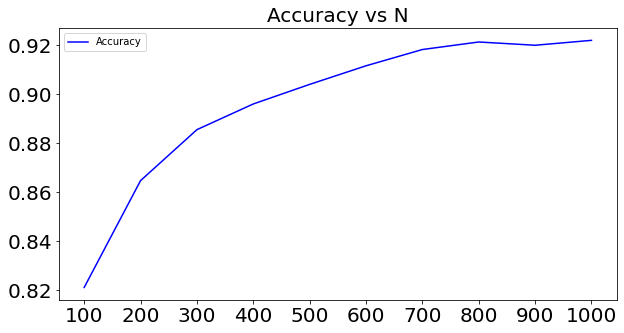

In [ ]:
# We draw the plot for the number N which is the trrain test split parameter vs the accuracy of the model
plt.figure(figsize=(10, 5))
plt.plot(scores, color='blue')
plt.xticks(range(len(Ns)), labels=Ns, size=20)
plt.yticks(size=20)
plt.legend(['Accuracy'])
plt.title('Accuracy vs N', size=20)
plt.show()

We draw the plot for the number N which is the trrain test split parameter vs the accuracy of the model. This means that the higher the number of training samples, the higher would be the accuracy of the model on the test set. This makes perfect sense because a larger number of training samples would allow the model to learn to classify the digits better by looking at more examples and hence reduce the variance. 

• Propose	a	new	method	of	selecting	the	training	set,	which	is	different	from	the	one	
proposed	in	Part	2.	Describe	the	new	selection	algorithm.	
• Divide	each	digit	class	(using	this	new	split	method)	into	two	sets:	the	training	set	consisting	
of	N	examples	for	each	of	the	digits	0	through	9,	and	the	testing	set	consisting	of	1100	−	N	
examples	of	each	of	the	digits	0	through	9,	where	N	is	the	optimal value	chosen	in	Part	2.
• Use	the	same	k	nearest	neighbors	classification	scheme	in	the	standard	Eu- clidean	metric	
with	fixed	k	=	20	to	verify	the	success	rate	of	your	classification	for	the	chosen	optimal	value	
of	N	with	the	new	split	of	training	vs	testing	data.		
• Draw	conclusions	about	the	impact	of	the	structure	of	the	training	vs	testing	split	based	on	
comparison	of	results	of	Part	2	and	Part	3.		

In [ ]:
X = np.vstack([mat['data'].transpose(2, 1, 0)[i, :, :] for i in range(10)])
y = np.array([[i]*1100 for i in range(10)]).reshape(-1)

In [ ]:
X.shape, y.shape

((11000, 256), (11000,))

In [ ]:
# Train-test split - random number of samples of each class in train and test (i.e. number of 1s, 2s,.... will be different)

In [ ]:
Ns = [i for i in range(100, 1100, 100)]
scores_3 = []
for N in tqdm(Ns, total=len(Ns)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1100-N)/1100, random_state=42, shuffle=True)
  print('Number of images in train set = {}, test set = {}'.format(X_train.shape[0], X_test.shape[0]))

  start_time = time.time()
  knn_clf = KNeighborsClassifier(n_neighbors=20, metric='euclidean') 
  knn_clf.fit(X_train, y_train)
  ckpt_1 = time.time()
  y_pred = knn_clf.predict(X_test)
  ckpt_2 = time.time()
  scores_3.append(accuracy_score(y_test, y_pred))
  print('For N = {}, accuracy = {:.4f} %, training time = {:.4f} sec, prediction time = {:.4f} sec'.format(N, 100*accuracy_score(y_test, y_pred), ckpt_1-start_time, ckpt_2-ckpt_1))
  print()

Number of images in train set = 1000, test set = 10000
For N = 100, accuracy = 81.4300 %, training time = 0.0543 sec, prediction time = 6.2946 sec

Number of images in train set = 2000, test set = 9000
For N = 200, accuracy = 86.3444 %, training time = 0.0631 sec, prediction time = 11.1481 sec

Number of images in train set = 3000, test set = 8000
For N = 300, accuracy = 88.8250 %, training time = 0.0984 sec, prediction time = 13.8074 sec

Number of images in train set = 4000, test set = 7000
For N = 400, accuracy = 90.3000 %, training time = 0.1482 sec, prediction time = 19.2963 sec

Number of images in train set = 5000, test set = 6000
For N = 500, accuracy = 90.6667 %, training time = 0.2107 sec, prediction time = 20.8311 sec

Number of images in train set = 6000, test set = 5000
For N = 600, accuracy = 91.7000 %, training time = 0.2531 sec, prediction time = 20.7658 sec

Number of images in train set = 7000, test set = 4000
For N = 700, accuracy = 92.1000 %, training time = 0.3489 

In [ ]:
# Number of images in train set = 1000, test set = 10000
# For N = 100, accuracy = 81.4300 %, training time = 0.0543 sec, prediction time = 6.2946 sec
# Here :	the	training	set	consisting	of	N	examples	for	each	of	the	digits	0	 through	9 
# and	the	testing	set	consisting	of	1100	−	N	examples	of	each	of	the	digits	0	through	 9,	where	N	ranges	from	100	to	1000

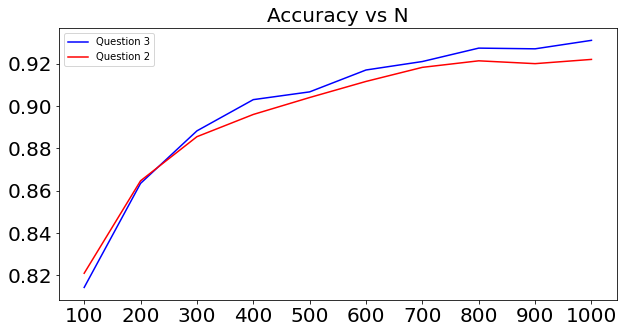

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(scores_3, color='blue')
plt.plot(scores, color='red')
plt.xticks(range(len(Ns)), labels=Ns, size=20)
plt.yticks(size=20)
plt.legend(['Question 3', 'Question 2'])
plt.title('Accuracy vs N', size=20)
plt.show()

Here the graph represents the number of training samples used vs the accuracy so higher the training samples used the higher is the accuracy

From the graph we note that the second approach performs better

Choose	the	best	training	set	selection	method	that	you	proposed	with	the	optimal	value	of N	
from	Part	2,	and	analyze	the	role	of	the	metric	in	the	classification	process.	For	this	purpose	compare	
the	distance	induced	by	the || ·||1	norm,	with	the	Euclidean	distance.	Draw	conclusions.		

In [ ]:
N = 1000 # best N = 1000 (from above graph)

In [ ]:
# Get train test split according to the second algorithm taking N = 1000 (this performs best, as is evident from the above graph)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1100-N)/1100, random_state=42, shuffle=True)

In [ ]:
# fit KNN classifier using and obtain predictions and accuracy
knn_clf_euclidean = KNeighborsClassifier(n_neighbors=20, metric='euclidean') 
knn_clf_euclidean.fit(X_train, y_train)
y_pred = knn_clf_euclidean.predict(X_test)
print('Accuracy using Euclidean metric = {}'.format(accuracy_score(y_test, y_pred)))

Accuracy using Euclidean metric = 0.931


In [ ]:
# fit KNN classifier using and obtain predictions and accuracy
knn_clf_manhattan = KNeighborsClassifier(n_neighbors=20, metric='manhattan') 
knn_clf_manhattan.fit(X_train, y_train)
y_pred = knn_clf_manhattan.predict(X_test)
print('Accuracy using Manhattan (L1 Norm) metric = {}'.format(accuracy_score(y_test, y_pred)))

Accuracy using Manhattan (L1 Norm) metric = 0.91


Clearly the Euclidean norm is a better metric. This is because it gives higher values for larger deviations from the true value, hence the model is more heavily penalized for very large deviations from the true value

Revisit	the	best	classification	results	from	previous	parts,	and	this	time	analyze	the	success	
percentages	for	each	compressed	digit	separately,	as	well	as	globally.	Analyze	the	performance	
differences	between	individual	digits	in	each	case.	Draw	conclusions.		

In [ ]:
Ns = [i for i in range(100, 1100, 100)]
scores_g = []
scores_d = {i: [] for i in Ns}
digits = [i for i in range(10)]
for N in tqdm(Ns, total=len(Ns)):
  X_train = np.vstack([mat['data'].transpose(2, 1, 0)[i, :N, :] for i in range(10)])
  y_train = np.array([[i]*N for i in range(10)]).reshape(-1)
  X_test = np.vstack([mat['data'].transpose(2, 1, 0)[i, N:, :] for i in range(10)])
  y_test = np.array([[i]*(1100-N) for i in range(10)]).reshape(-1)
  print('Number of images in train set = {}, test set = {}'.format(X_train.shape[0], X_test.shape[0]))

  knn_clf = KNeighborsClassifier(n_neighbors=20, metric='euclidean') 
  knn_clf.fit(X_train, y_train)
  y_pred = knn_clf.predict(X_test)
  scores_g.append(accuracy_score(y_test, y_pred))
  print('For N = {}, global accuracy = {:.4f}'.format(N, accuracy_score(y_test, y_pred)))

  for i in digits:
      X_test = mat['data'].transpose(2, 1, 0)[i, N:, :]
      y_test = np.array([i]*(1100-N)).reshape(-1) 
      y_pred = knn_clf.predict(X_test)
      scores_d[N].append(accuracy_score(y_test, y_pred))
      print('For N = {} and digit = {}, accuracy = {:.4f}'.format(N, i, accuracy_score(y_test, y_pred)))

  print()

Number of images in train set = 1000, test set = 10000
For N = 100, global accuracy = 0.8210
For N = 100 and digit = 0, accuracy = 0.9580
For N = 100 and digit = 1, accuracy = 0.7310
For N = 100 and digit = 2, accuracy = 0.9320
For N = 100 and digit = 3, accuracy = 0.7150
For N = 100 and digit = 4, accuracy = 0.8330
For N = 100 and digit = 5, accuracy = 0.8990
For N = 100 and digit = 6, accuracy = 0.8520
For N = 100 and digit = 7, accuracy = 0.6590
For N = 100 and digit = 8, accuracy = 0.6940
For N = 100 and digit = 9, accuracy = 0.9370

Number of images in train set = 2000, test set = 9000
For N = 200, global accuracy = 0.8647
For N = 200 and digit = 0, accuracy = 0.9800
For N = 200 and digit = 1, accuracy = 0.8067
For N = 200 and digit = 2, accuracy = 0.9500
For N = 200 and digit = 3, accuracy = 0.7600
For N = 200 and digit = 4, accuracy = 0.8911
For N = 200 and digit = 5, accuracy = 0.9400
For N = 200 and digit = 6, accuracy = 0.9089
For N = 200 and digit = 7, accuracy = 0.6856
For 

In this we take N=100,200,300 and so on till 1100. This N represents the number of training samples used for the purpose of training. Then for each of these we split the train and test accordingly and then we write the accuracy we acieve for each and every digit. For exapmle if we consider the N=400 then for the digit = 2 classification the accuracy was 0.8614. Similarly we can interpolate for other vales as well. We observe that for low values of N, some digits have very poor accuracy (as low as 70% at times). On the other hand some digits like 9 are learnt very well with just a few samples and hence the accuracy is very high (>99%) for N=400 itself. This means that digits like 0, 2, 9 etc. are easy to classify, while on the other hand the classifier really strugges with 7 (only 79% in the best case). Hence to improve the overall accuracy we need to improve the images corresponding to 7 in the dataset. If the variance in that is reduced, the classifier performance will improve a lot.  